In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle as pk


In [2]:
energy = [[] for k in range(2, 8)]
for k in range(2, 8):
    with open('VaryM\\QMCENERG_x=1z=05_beta1_m' + str(k) + '.txt', 'rb') as fichier:
        energy[k - 2] = pk.load(fichier)

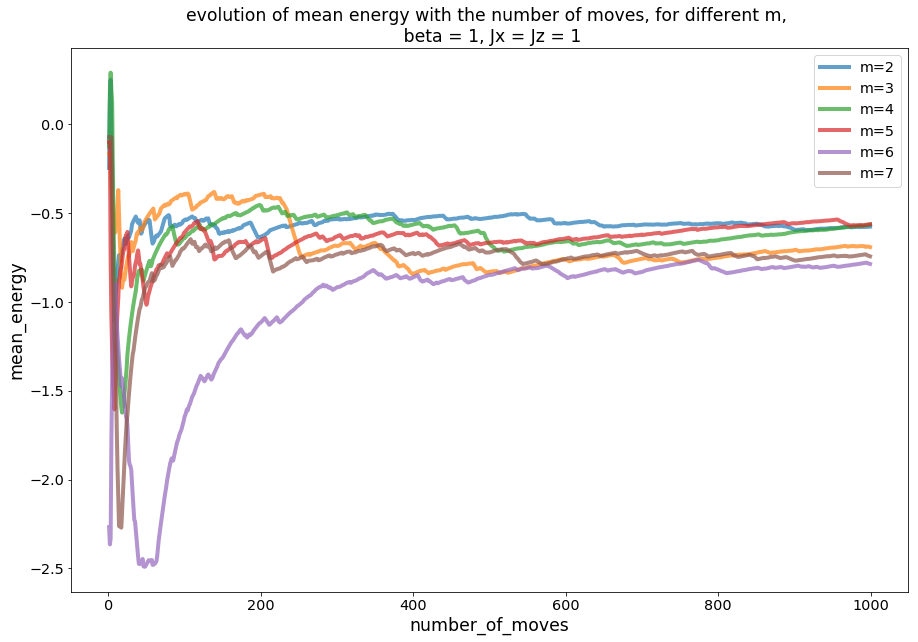

In [3]:
fig = plt.figure(figsize = (15,10))
x=np.arange(1, 1e3)
menergy = [[] for k in range(2,8)]
for k in range(2, 8):
    menergy[k - 2] = np.cumsum(energy[k - 2][1:1000]) / x


plt.xlabel('number_of_moves', fontsize = 'xx-large')
plt.ylabel('mean_energy', fontsize = 'xx-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('evolution of mean energy with the number of moves, for different m, \n beta = 1, Jx = Jz = 1', fontsize = 'xx-large')

for k in range(2, 8):
    plt.plot(x, menergy[k-2], label = 'm='+str(k), lw = 4, alpha = 0.7)


plt.legend(loc = 0, fontsize = 'x-large')
plt.savefig('mean_energy_evolution_loop_x=1z=05_m2-7.png')

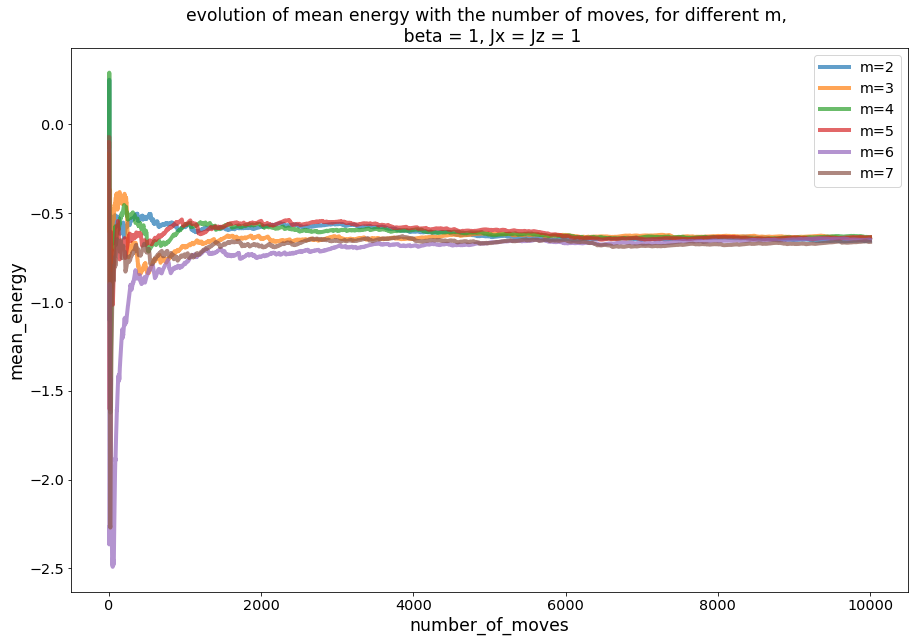

In [4]:
fig = plt.figure(figsize = (15,10))
x=np.arange(1, 1e4)
menergy = [[] for k in range(2,8)]
for k in range(2, 8):
    menergy[k - 2] = np.cumsum(energy[k - 2][1:10000]) / x


plt.xlabel('number_of_moves', fontsize = 'xx-large')
plt.ylabel('mean_energy', fontsize = 'xx-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('evolution of mean energy with the number of moves, for different m, \n beta = 1, Jx = Jz = 1', fontsize = 'xx-large')

for k in range(2, 8):
    plt.plot(x, menergy[k-2], label = 'm='+str(k), lw = 4, alpha = 0.7)


plt.legend(loc = 0, fontsize = 'x-large')
plt.savefig('mean_energy_evolution_larger_loop_x=1z=05_m2-7.png')

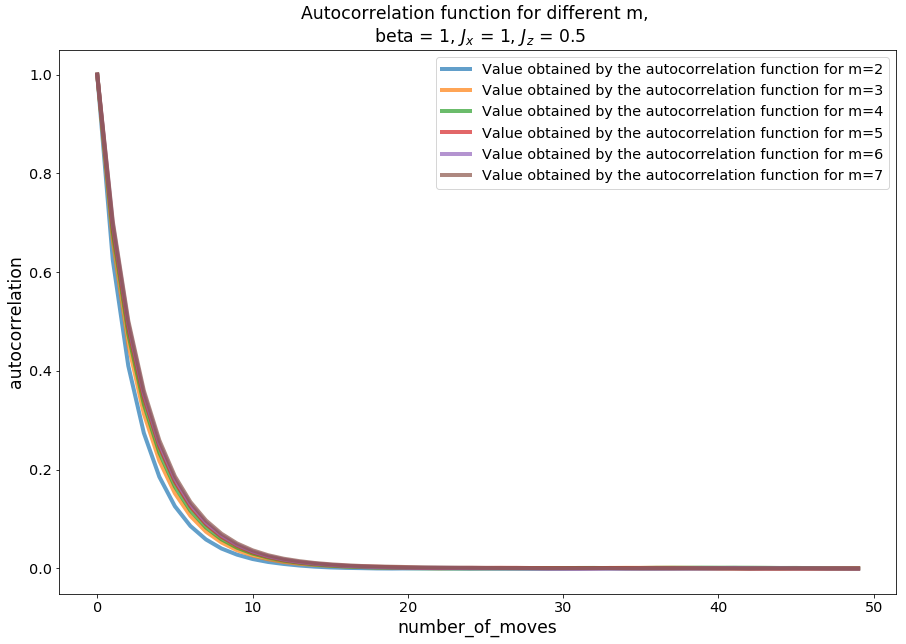

In [6]:
sqmean = [np.mean(energy[k][:10000000 - 500] * energy[k][:10000000 - 500]) for k in range(6)]
meansq = [np.mean(energy[k][:10000000 - 500]) ** 2 for k in range(6)]
autoco = [np.zeros(500) for k in range(6)]

for k in range(6):
    for t in range (500):
        Energies_tmove = (energy[k][t:t+10000000 - 500])
        corr = np.mean(energy[k][:10000000 - 500] * Energies_tmove)
        autoco[k][t] = (corr - meansq[k])/(sqmean[k] - meansq[k])
x=np.linspace(0,499,500)


fig = plt.figure(figsize = (15,10))

plt.xlabel('number_of_moves', fontsize = 'xx-large')
plt.ylabel('autocorrelation', fontsize = 'xx-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('Autocorrelation function for different m, \n beta = 1, $J_x$ = $1$, $J_z$ = $0.5$', fontsize = 'xx-large')

for k in range(2, 8):
    plt.plot(x[:50], autoco[k-2][:50], label = 'Value obtained by the autocorrelation function for m='+str(k),
             lw = 4, alpha = 0.7)

plt.legend(loc = 0, fontsize = 'x-large')
plt.savefig('autocorr_loop_x=1z=05.png')